In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### 1 Problème jouet
Pour ce premier exercice, vous allez implémenter et tester la regression logistique sur un problème ”jouet”. Ce problème comprend des points étiquetés (x, yi) ∈ R2 × {λ1, λ2}, et les distributions des classes suivent une loi normale, i.e. $λ_1$ ∼ N ($μ_1$, $σ^2_1$ )  et  $λ_2$ ∼ N ($μ_2$, $σ^2_2$ ).

1. Générez cette base de données synthétiques telle que :
- chaque classe contient 300 points
- $λ_1$ ∼ N ((1, 1), 0.7) et $λ_2$ ∼ N ((−1, −1), 0.7)

In [4]:
n = 300
c1 = np.random.normal((1,1), 0.7, (n, 2))
c2 = np.random.normal((-1,-1), 0.7, (n, 2))

In [7]:
labels_1 = np.ones(n) # c1 = 1
labels_2 = np.zeros(n) # c2 = 0

data = np.vstack((c1, c2))
labels = np.hstack((labels_1, labels_2))

2. Affichez le nuage de points pour obtenir un résultat similaire à celui de la figure 1

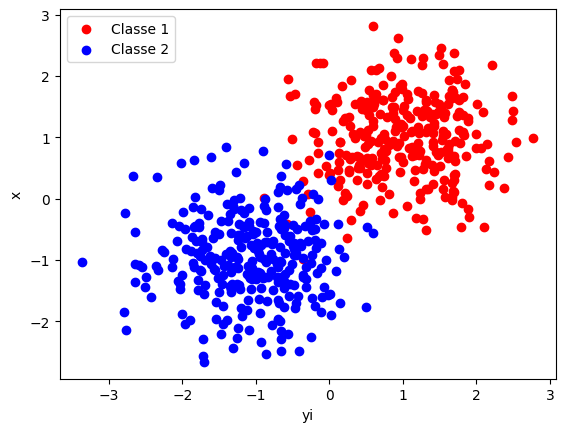

In [11]:
def plot_data():
    plt.scatter(c1[:, 0], c1[:, 1], color='red', label='Classe 1')
    plt.scatter(c2[:, 0], c2[:, 1], color='blue', label='Classe 2')
    plt.legend()
    plt.xlabel("yi")
    plt.ylabel("x")
    plt.show()

plot_data()


Avant d’implémenter votre propre méthode de régression logistique, vous allez tester celle de scikit-learn :

3. Importez la module de régression logistique de scikit-learn 1 et lancer l’entrainement sur la base synthétique que vous venez de créer

In [18]:
log_reg = LogisticRegression(random_state=0).fit(data, labels)

4. Affichez la fonction de décision du modèle, comme montré en figure 2. Pour cela :
- Générez une grille de points 2D
- Rassembler les prédictions du modèle pour chacun des points de cette grille.
- Afficher le nuage de points de la base d’apprentissage
- Afficher les frontières de décisions en utilisant la fonction contourf de Matplotlib.

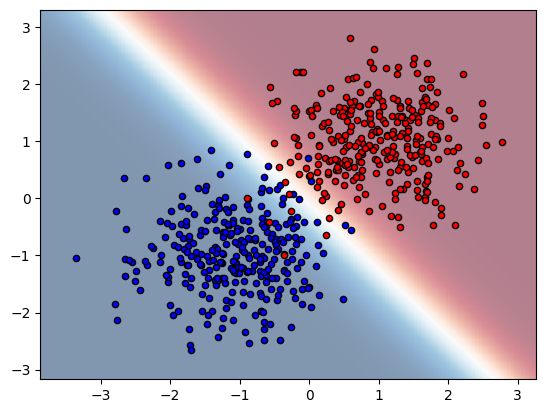

In [19]:
def mesh(X, h=0.02):
    x_min , x_max = X[:, 0]. min() - .5, X[:, 0]. max() + .5
    y_min , y_max = X[:, 1]. min() - .5, X[:, 1]. max() + .5
    xx , yy = np.meshgrid(np.arange(x_min , x_max , h), np.arange(y_min , y_max , h))
    return np.c_[xx.ravel (), yy.ravel ()], xx , yy

xtest_grid , xx , yy = mesh(data)
Z = log_reg.predict_proba(xtest_grid)[:, 0]
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx , yy , Z, cmap=plt.cm.RdBu , alpha =.5)
plt.scatter(data[labels == 0, 0], data[labels == 0, 1], c='b', edgecolors="k", s=20)
plt.scatter(data[labels == 1, 0], data[labels == 1, 1], c='r', edgecolors="k", s=20)
plt.show()

### 2 Régression logistique sur le problème jouet
Vous allez maintenant implémenter votre propre modèle de regression logistique. Pour cela :
1. Implémentez le calcul du coût en complétant la fonction ci-dessous :

In [66]:
def logreg_cost(X, y, w):
    z = X @ w
    cost = -np.sum(z @ y) + np.sum(np.log(1+np.exp(z)))
    return cost

2. Implémentez le calcul du gradient de la fonction de coût en complétant la fonction ci-dessous :

In [67]:
def logreg_grad(X, y, w):
    z = X @ w
    p = np.exp(z)/(1 + np.exp(z))
    grad = -np.sum((y - p) @ X)
    # -X.T @ (y - p)
    return grad

3. Implémentez l’estimation des paramètres du modèle de regression logistique en utilisant la méthode de descente de gradient :

In [68]:
def logreg_descent(X, y, learning_rate =1e-3, max_iter =1000):
    n, d = X.shape
    X = np.concatenate ((X, np.ones((n, 1))), axis =1)
    w = np.random.randn(d+1)
    step = learning_rate
    beta = 0.9 # for backtracking if needed - to tune
    
    costs = np.zeros(max_iter)

    print("X= ",np.shape(X))
    print("y= ",np.shape(y))
    print("w= ",np.shape(w))

    for i in range(max_iter):
        w = w - step*logreg_grad(X, y, w)
        costs[i] = logreg_cost(X, y, w)

    return w, costs

4. Tracez la courbe de l’évolution du coût au fil de l’apprentissage. Commentez ce résultat.

In [69]:
wmin, costs = logreg_descent(data, labels)

xtest_grid , xx , yy = mesh(data)
Z = xtest_grid @ wmin
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx , yy , Z, cmap=plt.cm.RdBu , alpha =.5)
plt.scatter(data[labels == 0, 0], data[labels == 0, 1], c='b', edgecolors="k", s=20)
plt.scatter(data[labels == 1, 0], data[labels == 1, 1], c='r', edgecolors="k", s=20)
plt.show()

X=  (600, 3)
y=  (600,)
w=  (3,)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)

5. Affichez la fonction de décision résultante comme à l’exercice précédent. Commentez ce résultat

In [55]:
xtest_grid , xx , yy = mesh(data)
Z = logreg_descent(xtest_grid)[:, 0]
# Z = log_reg.predict_proba(xtest_grid)[:, 0]
logreg_descent
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx , yy , Z, cmap=plt.cm.RdBu , alpha =.5)
plt.scatter(data[labels == 0, 0], data[labels == 0, 1], c='b', edgecolors="k", s=20)
plt.scatter(data[labels == 1, 0], data[labels == 1, 1], c='r', edgecolors="k", s=20)
plt.show()

X=  (324, 358)
y=  (324, 357)
w=  (358,)


ValueError: operands could not be broadcast together with shapes (324,357) (324,) 

6. Estimez les performances en généralisation de votre méthode.

Este algoritmo de regressao logistica foi construido corretamente? Como utiliza-lo em um dataset para visualizar a fonction de décision?

def logreg_cost(X, y, w):
    z = X @ w
    cost = -np.sum(z @ y) + np.sum(np.log(1+np.exp(z)))
    return cost

def logreg_grad(X, y, w):
    z = X @ w
    p = np.exp(z)/(1 + np.exp(z))
    grad = -np.sum((y - p) @ X)
    return grad

def logreg_descent(X, y, learning_rate =1e-3, max_iter =1000):
    n, d = X.shape
    X = np.concatenate ((X, np.ones((n, 1))), axis =1)
    w = np.random.randn(d+1)
    step = learning_rate
    
    costs = np.zeros(max_iter)

    print("X= ",np.shape(X))
    print("y= ",np.shape(y))
    print("w= ",np.shape(w))

    for i in range(max_iter):
        w = w - step*logreg_grad(X, y, w)
        costs[i] = logreg_cost(X, y, w)

    return w, costs

### 3 Diagnostique médical
On propose maintenant de tester votre modèle sur un problème réel d’aide au diagnostique de cancer du sein à partir d’images de biopsie à l’aiguille fine. Plusieurs caractéristiques ont été calculées pour décrire les noyaux cellulaires présents sur chaque image. Cette base de données est disponible et documentée dans scikit-learn. Note that the data in this dataset is not normalised.

1. Comparez votre algorithme de régression logistique à l’implémentation de scikit-learn sur ce
dataset. Les résultats seront présentés avec des taux de bonne classification moyen et des
écart-types.